# Stanardization

Standardization is the process of transforming data into a common format, such that all of the values have the same mean and standard deviation. This is done by subtracting the mean from each value and then dividing by the standard deviation.

**_There are several reasons why we need to standardize our data_**:

**To make the data comparable**: When we are working with data that has different scales, it can be difficult to compare the values. Standardization makes the data comparable by transforming it into a common scale.
**To improve the performance of machine learning algorithms**: Many machine learning algorithms are more accurate when the data is standardized. This is because standardization helps to reduce the impact of outliers on the model.
**To improve the interpretability of results**: Standardized data is easier to interpret than non-standardized data. This is because the standardized values are centered around 0 and have a standard deviation of 1.

_We prefer standardization over normalization when we want to make the data comparable and to improve the performance of machine learning algorithms. Normalization is a different type of data transformation that scales the data to a range of [0, 1] or [-1, 1]. Normalization is not as effective as standardization for improving the performance of machine learning algorithms, but it can be useful for other purposes, such as data visualization._

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')

In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df=df.iloc[:,2:]

In [9]:
df.sample(5)

,Age,EstimatedSalary,Purchased
25,47,20000,1
301,48,74000,1
273,39,106000,1
372,39,73000,0
290,39,134000,1


## Train test split

df.drop('Purchased', axis=1): This selects all the columns/features in the DataFrame df except the 'Purchased' column. These selected columns will be the input features for the model.

df['Purchased']: This selects the 'Purchased' column from the DataFrame df. This column contains the target variable or the labels.

test_size=0.3: This specifies that 30% of the data will be used for testing, while the remaining 70% will be used for training.

random_state=0: This sets the random seed to ensure reproducibility. By setting the random_state to a specific value (in this case, 0), the split will be the same each time you run the code, which is useful for reproducible results.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

## StandardScaler

X_train_scaled = scaler.transform(X_train): Applying the learned scaling parameters from the scaler to transform the training set (X_train). This step standardizes the training set by subtracting the mean and dividing by the standard deviation of each feature.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit&transaform function()

_We use fit and transform in machine learning to_:

**Learn the parameters of a model**: The fit method learns the parameters of a model, such as the mean and standard deviation of a feature. This information is then used by the transform method to transform the data.
**Normalize the data**: The transform method normalizes the data, which means that it scales the data to a common range. This can be useful for machine learning algorithms that are sensitive to the scale of the data.
**Impute missing values**: The transform method can also be used to impute missing values. This means that it can replace missing values with estimated values.

The fit and transform methods are often used together in machine learning pipelines. A machine learning pipeline is a sequence of steps that are used to transform data and build a model. The fit and transform methods are often used in the first step of a machine learning pipeline, to prepare the data for modeling.

_Yes, it is a rule that we do not fit the test dataset. This is because the test dataset is used to evaluate the performance of the model on unseen data. If we fit the test dataset, we are essentially training the model on the test data, which will artificially inflate the performance of the model._

Here are some of the reasons why we do not fit the test dataset:

**To avoid overfitting**: Overfitting occurs when a model learns the training data too well and is unable to generalize to new data. If we fit the test dataset, we are essentially training the model on the test data, which can lead to overfitting

**To get an accurate estimate of model performance**: The test dataset is used to get an accurate estimate of the model's performance on unseen data. If we fit the test dataset, we are essentially using the test data to train the model, which will artificially inflate the performance of the model.

**To be fair to other models**: If we fit the test dataset, we are giving an unfair advantage to the model that is fitted to the test data. This is because the other models will not have access to the test data, so they will not be able to perform as well.

Therefore, it is important to avoid fitting the test dataset. This will ensure that the model is evaluated on unseen data and that the performance of the model is accurate.

In [12]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [13]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [14]:
pd.DataFrame(X_train_scaled, columns=['Age','EstimatedSalary'] )

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [16]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [17]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5)): Creating a figure with two subplots arranged horizontally (side by side). ax1 and ax2 represent the two subplots, and figsize=(12, 5) sets the size of the figure.

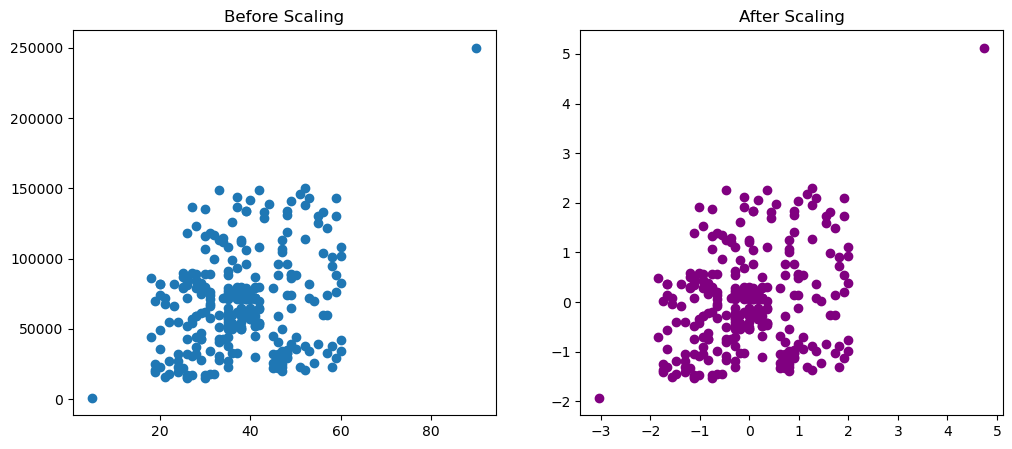

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='purple')
ax2.set_title("After Scaling")
plt.show()

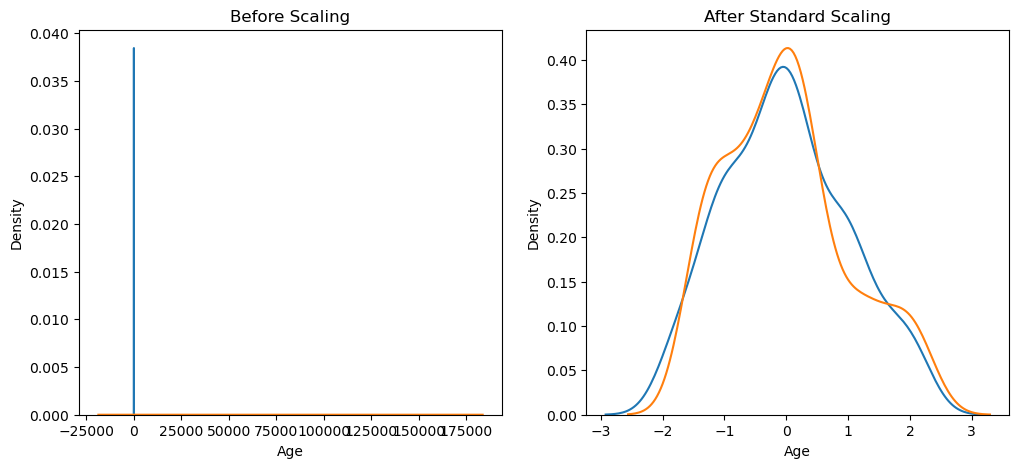

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Comparison of Distributions

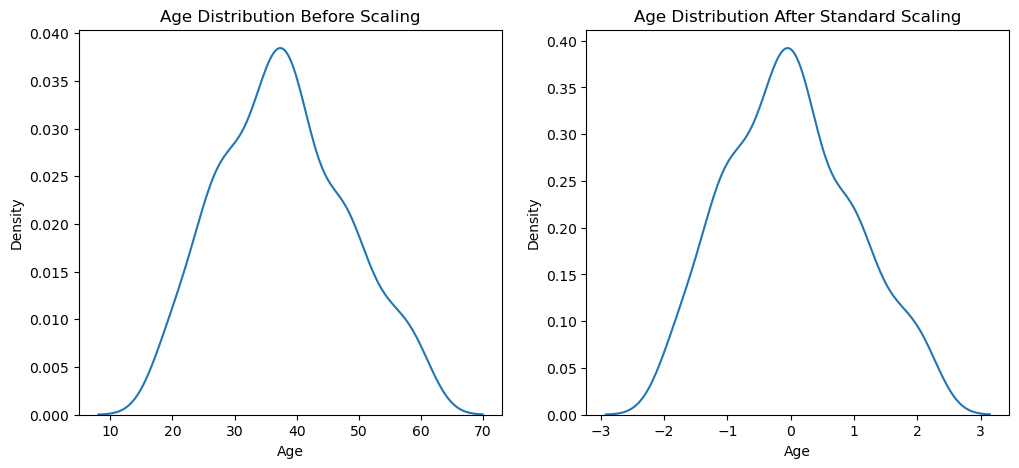

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

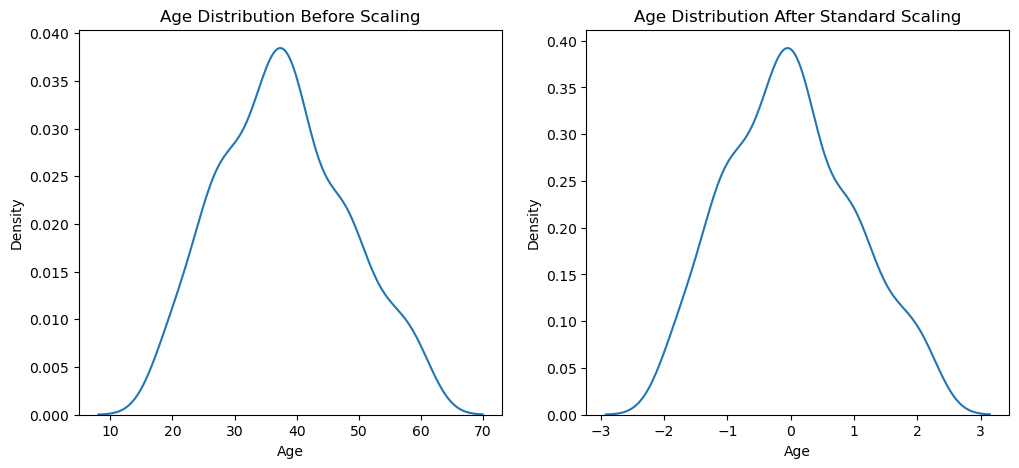

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

## Why scaling is important?

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [24]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [25]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Plot the original test data
plt.plot(X_test.index, y_test, label='Actual', marker='o')

# Plot the predicted values from the logistic regression model on original data
plt.plot(X_test.index, y_pred, label='Predicted (Original)', marker='o')

# Plot the predicted values from the logistic regression model on scaled data
plt.plot(X_test.index, y_pred_scaled, label='Predicted (Scaled)', marker='o')

plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Comparison of Predicted Values')
plt.legend()
plt.show()


ValueError: 'c' argument has 120 elements, which is inconsistent with 'x' and 'y' with size 121.

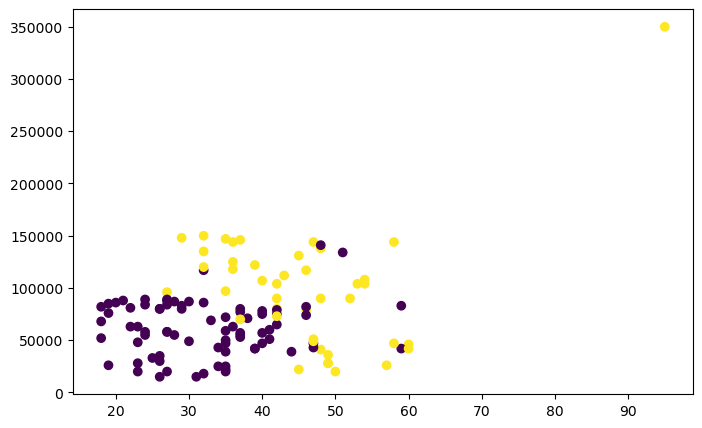

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Plot the actual test data
plt.scatter(X_test['Age'], X_test['EstimatedSalary'], c=y_test, label='Actual', cmap='viridis')

# Plot the predicted values from the logistic regression model on original data
plt.scatter(X_test['Age'], X_test['EstimatedSalary'], c=y_pred, label='Predicted (Original)', marker='o', cmap='Set1')

# Plot the predicted values from the logistic regression model on scaled data
plt.scatter(X_test['Age'], X_test['EstimatedSalary'], c=y_pred_scaled, label='Predicted (Scaled)', marker='s', cmap='Set2')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Comparison of Predicted Values')
plt.legend()
plt.colorbar()
plt.show()


ValueError: num must be 1 <= num <= 2, not 3

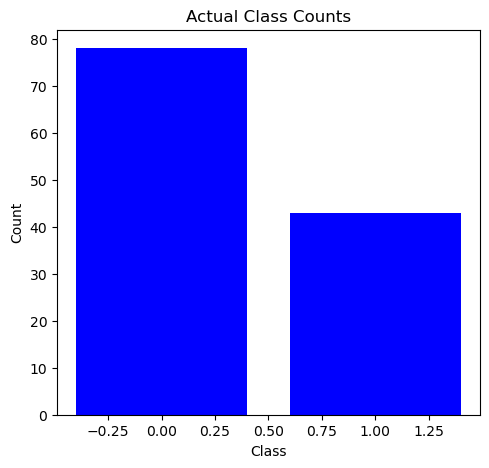

In [66]:

import numpy as np
import matplotlib.pyplot as plt

# Count the occurrences of each class in the actual and predicted values
unique_classes, actual_counts = np.unique(y_test, return_counts=True)
pred_counts = np.bincount(y_pred)
pred_scaled_counts = np.bincount(y_pred_scaled)

plt.figure(figsize=(12, 5))

# Plot the bar chart for actual values
plt.subplot(1, 2,1)
plt.bar(unique_classes, actual_counts, label='Actual', color='blue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Actual Class Counts')

# Plot the bar chart for predicted values (before scaling)
# plt.subplot(1, 3, 2)
# plt.bar(unique_classes, pred_counts, label='Predicted (Before Scaling)', color='red')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.title('Predicted Class Counts (Before Scaling)')

# Plot the bar chart for predicted values (after scaling)
plt.subplot(1, 2,3)
plt.bar(unique_classes, pred_scaled_counts, label='Predicted (After Scaling)', color='green')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Predicted Class Counts (After Scaling)')

plt.tight_layout()
plt.show()



In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [30]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Effect of Outlier

In [31]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)
df

C:\Users\SHUBHI\AppData\Local\Temp\ipykernel_13432\4162112257.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


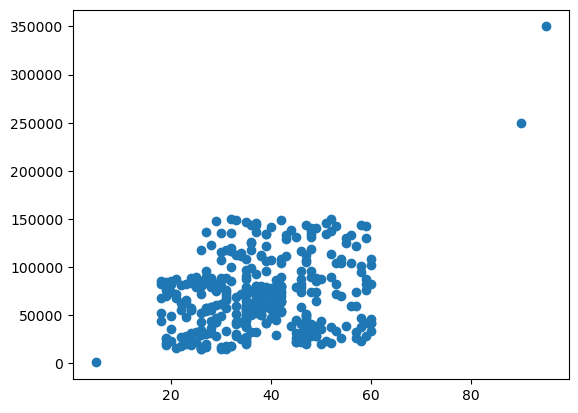

In [32]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

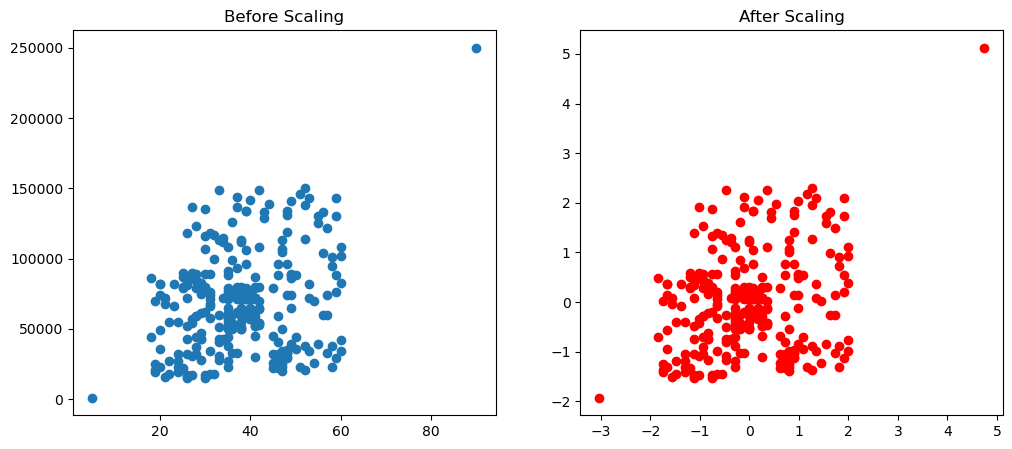

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()